## 1. Install and import all necessary libraries in your Jupyter notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
# Ensure graphs are displayed 

%matplotlib inline

## 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

    Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
    Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [5]:
# Creating path
path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\DATA'

#Importing Data
listings = pd.read_csv(os.path.join(path, 'listings_cleaned.csv'), index_col = False)

In [6]:
# Creating a subframe with only numerical columns
listings_numericals = listings.select_dtypes(include=[np.number])

listings_numericals.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,638401413782978130,382146507,1.00,1.00,72,36.722069,-4.420914,4,1.0,2.0,...,2.3,1125.0,100,58,4,63,63,0,0,3.99
1,593807685540946920,11733642,1.00,1.00,24,36.727180,-4.413260,7,2.0,4.0,...,2.5,1125.0,12,4,1,20,20,0,0,0.46
2,689209787389564671,13967638,1.00,0.43,3,36.727710,-4.412884,4,2.0,2.0,...,2.0,365.0,11,6,0,2,1,1,0,0.60
3,1169368107504912867,4884962,1.00,1.00,38,36.719241,-4.420821,10,2.0,2.0,...,3.0,971.5,0,0,0,17,17,0,0,NaN
4,53218911,413971511,0.95,0.99,35,36.737370,-4.434390,2,1.0,0.0,...,2.0,1125.0,17,4,0,4,4,0,0,0.53


In [7]:
listings_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8976 non-null   int64  
 1   host_id                                       8976 non-null   int64  
 2   host_response_rate                            8395 non-null   float64
 3   host_acceptance_rate                          8594 non-null   float64
 4   host_total_listings_count                     8976 non-null   int64  
 5   latitude                                      8976 non-null   float64
 6   longitude                                     8976 non-null   float64
 7   accommodates                                  8976 non-null   int64  
 8   bathrooms                                     8650 non-null   float64
 9   bedrooms                                      8910 non-null   f

In [8]:
# Creating a new dataframe with relevant columns for clustering
listings_selected = listings_numericals[['host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price','number_of_reviews', 'reviews_per_month']]

# Displaying the first few rows to verify
listings_selected.head()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,reviews_per_month
0,72,36.722069,-4.420914,4,1.0,2.0,2.0,178.0,100,3.99
1,24,36.727180,-4.413260,7,2.0,4.0,5.0,219.0,12,0.46
2,3,36.727710,-4.412884,4,2.0,2.0,2.0,141.0,11,0.60
3,38,36.719241,-4.420821,10,2.0,2.0,6.0,162.0,0,NaN
4,35,36.737370,-4.434390,2,1.0,0.0,1.0,53.0,17,0.53


In [9]:
# Check for missing values

listings_selected.isnull().sum()

host_total_listings_count       0
latitude                        0
longitude                       0
accommodates                    0
bathrooms                     326
bedrooms                       66
beds                          327
price                         390
number_of_reviews               0
reviews_per_month            1213
dtype: int64

In [10]:
# Dropping the column 'reviews_per_month'

listings_selected.drop(columns=['reviews_per_month'], inplace=True)

C:\Users\Víctor A\AppData\Local\Temp\ipykernel_15844\2461355347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected.drop(columns=['reviews_per_month'], inplace=True)


In [11]:
# Dropping rows with missing 

listings_cleaned = listings_selected.dropna()

In [12]:
# Recheck for missing values

listings_cleaned.isnull().sum()

host_total_listings_count    0
latitude                     0
longitude                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
price                        0
number_of_reviews            0
dtype: int64

In [13]:
# Displaying summary statistics of the cleaned data

listings_cleaned.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews
count,8571.000000,8571.000000,8571.000000,8571.000000,8571.000000,8571.000000,8571.000000,8571.000000,8571.000000
mean,57.387819,36.720204,-4.421377,4.053436,1.312216,1.669000,2.484191,156.220044,43.482791
std,162.519538,0.014000,0.025001,2.193379,0.681606,1.226123,2.029957,288.507524,74.304106
min,1.000000,36.646012,-4.584345,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,2.000000,36.718020,-4.429414,2.000000,1.000000,1.000000,1.000000,89.000000,3.000000
50%,8.000000,36.722120,-4.422620,4.000000,1.000000,1.000000,2.000000,119.000000,14.000000
75%,56.000000,36.725240,-4.417495,5.000000,1.500000,2.000000,3.000000,166.000000,50.000000
max,6437.000000,36.875649,-4.278520,16.000000,11.000000,25.000000,50.000000,12099.000000,906.000000


In [14]:
# Removing latitude and longitude columns.

listings_cleaned = listings_cleaned.drop(columns=['latitude', 'longitude'])

In [15]:
listings_cleaned.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews
0,72,4,1.0,2.0,2.0,178.0,100
1,24,7,2.0,4.0,5.0,219.0,12
2,3,4,2.0,2.0,2.0,141.0,11
3,38,10,2.0,2.0,6.0,162.0,0
4,35,2,1.0,0.0,1.0,53.0,17


In [16]:
# Function to plot boxplots for each column

def plot_boxplots(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

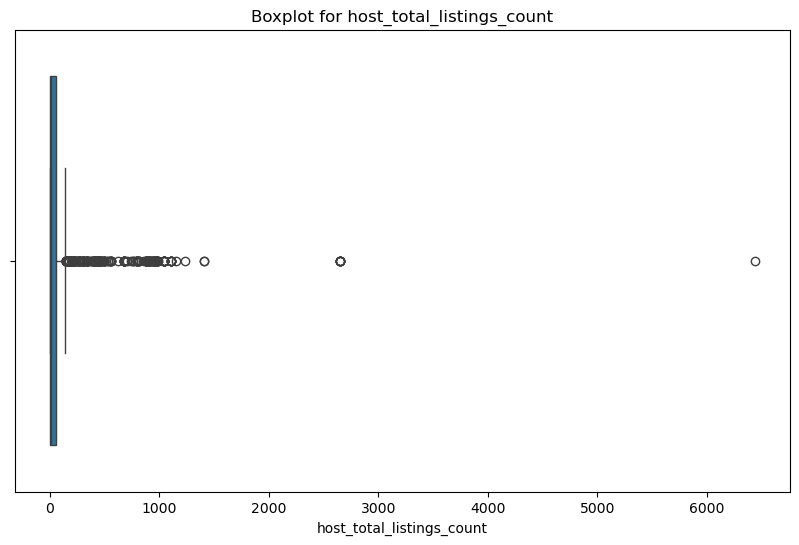

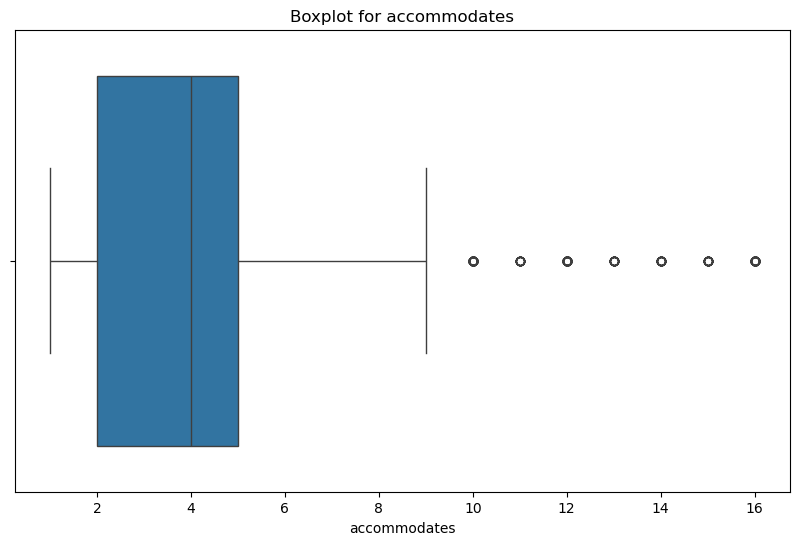

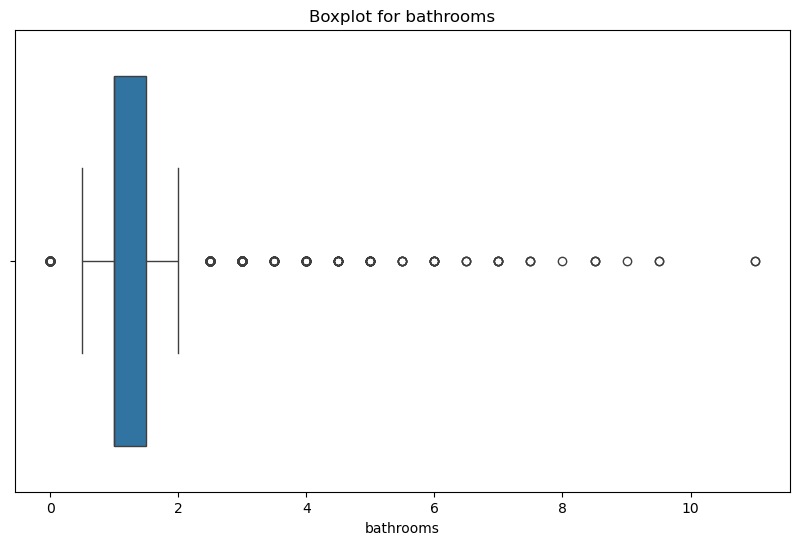

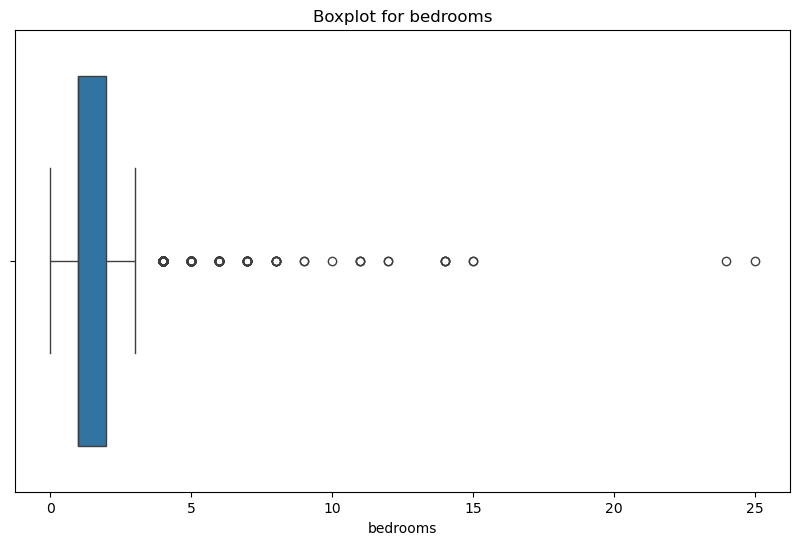

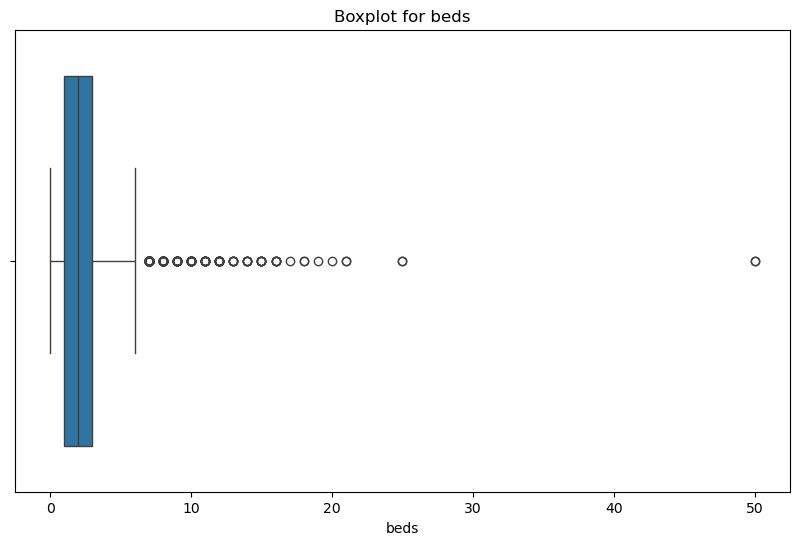

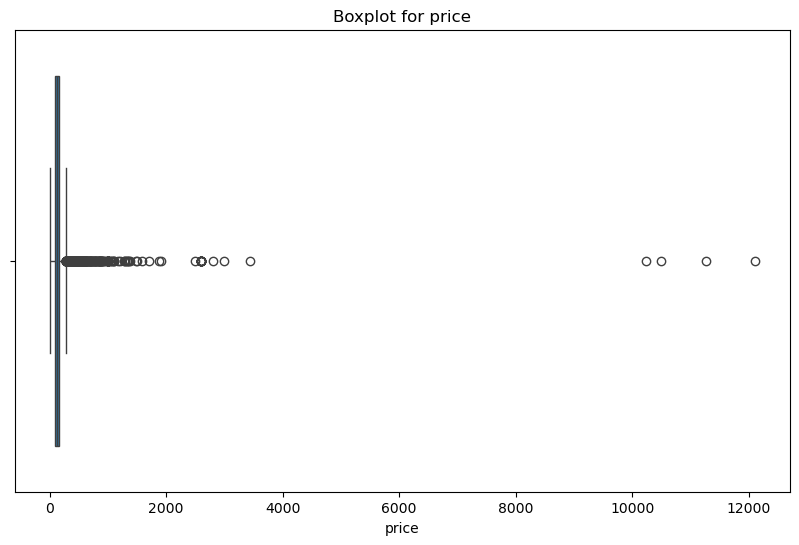

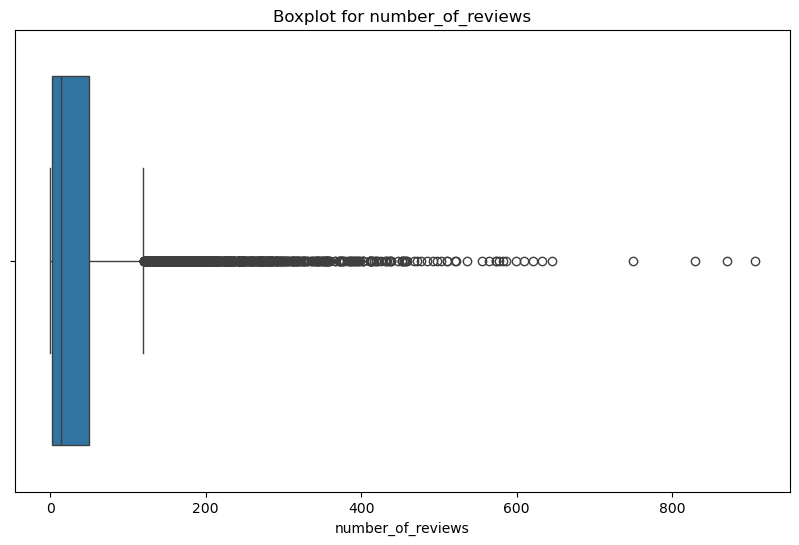

In [17]:
plot_boxplots(listings_cleaned)

In [18]:
# Removing outliers based on specified conditions
listings_cleaned = listings_cleaned[
    (listings_cleaned['host_total_listings_count'] <= 100) &
    (listings_cleaned['beds'] <= 30) &
    (listings_cleaned['price'] <= 2000) &
    (listings_cleaned['number_of_reviews'] <= 200)
]

# Verifying the changes
listings_cleaned.describe()


,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews
count,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000
mean,19.911811,4.020231,1.307522,1.674028,2.450349,142.099302,32.712637
std,27.084550,2.210726,0.663437,1.186762,1.932660,114.841977,43.245057
min,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,88.000000,3.000000
50%,6.000000,4.000000,1.000000,1.000000,2.000000,117.000000,14.000000
75%,28.000000,5.000000,1.500000,2.000000,3.000000,160.000000,46.000000
max,100.000000,16.000000,9.500000,15.000000,25.000000,1914.000000,200.000000


In [19]:
# Removing the 'beds' column because is redundant
listings_cleaned = listings_cleaned.drop(columns=['beds'])

# Verifying the changes
listings_cleaned.head()


,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,72,4,1.0,2.0,178.0,100
1,24,7,2.0,4.0,219.0,12
2,3,4,2.0,2.0,141.0,11
3,38,10,2.0,2.0,162.0,0
4,35,2,1.0,0.0,53.0,17


### Standardize Data

In [21]:
# Import StandarScaler

from sklearn.preprocessing import StandardScaler

In [22]:
# Initializing the scaler
scaler = StandardScaler()

# Selecting the columns to be standardized
columns_to_standardize = [
    'host_total_listings_count', 'accommodates', 'bathrooms', 
    'bedrooms', 'price', 'number_of_reviews'
]

# Fitting and transforming the selected columns
listings_cleaned[columns_to_standardize] = scaler.fit_transform(listings_cleaned[columns_to_standardize])

In [23]:
listings_cleaned.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,1.923307,-0.009152,-0.463562,0.274693,0.312632,1.556066
1,0.150952,1.347965,1.043847,1.960072,0.669670,-0.478994
2,-0.624453,-0.009152,1.043847,0.274693,-0.009573,-0.502119
3,0.667889,2.705082,1.043847,0.274693,0.173300,-0.756502
4,0.557117,-0.913897,-0.463562,-1.410685,-0.775898,-0.363365


In [24]:
listings_cleaned[columns_to_standardize].describe()

,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews
count,7.019000e+03,7.019000e+03,7019.000000,7.019000e+03,7.019000e+03,7.019000e+03
mean,-4.049253e-18,2.378936e-17,0.000000,2.733246e-17,8.098507e-17,8.300969e-17
std,1.000071e+00,1.000071e+00,1.000071,1.000071e+00,1.000071e+00,1.000071e+00
min,-6.983006e-01,-1.366269e+00,-1.970972,-1.410685e+00,-1.167769e+00,-7.565019e-01
25%,-6.613766e-01,-9.138966e-01,-0.463562,-5.679958e-01,-4.711096e-01,-6.871249e-01
50%,-5.136804e-01,-9.151856e-03,-0.463562,-5.679958e-01,-2.185707e-01,-4.327424e-01
75%,2.986487e-01,4.432205e-01,0.290143,2.746934e-01,1.558835e-01,3.072793e-01
max,2.957180e+00,5.419317e+00,12.349419,1.122965e+01,1.543013e+01,3.868634e+00


## 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [26]:
# Defining the range of potential clusters in the data
num_cl = range(1, 10) 

# Defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]

In [27]:
# Calculating the score for each k-means model
score = [kmeans[i].fit(listings_cleaned).score(listings_cleaned) for i in range(len(kmeans))] 

# Displaying the scores
score

[-42114.0,
 -31065.820289645315,
 -25985.450141654328,
 -21580.610024645903,
 -17582.037181905966,
 -16827.153232463912,
 -16170.989529033013,
 -14222.10264958601,
 -13456.96806809766]

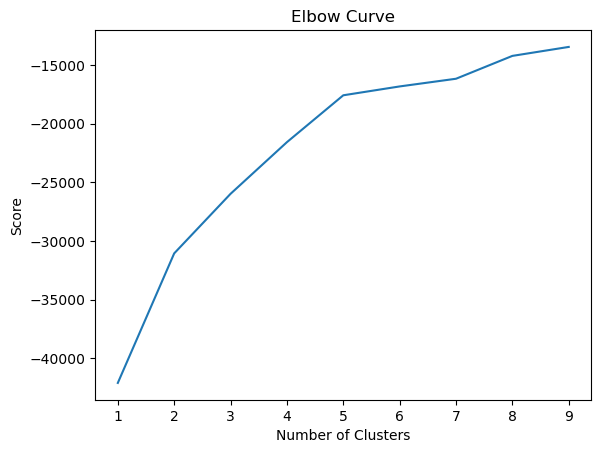

In [28]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

    Explain why you chose that number in a markdown cell.
    If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

### The curve appears less pronounced starting from 5 clusters, although it becomes somewhat pronounced again after 7 clusters. I believe the right decision is to choose 5 clusters.

## 5. Run the k-means algorithm.

In [32]:
# Create the k-means object with 5 clusters

kmeans = KMeans(n_clusters=5)

In [33]:
# Fit the k-means object to the data

kmeans.fit(listings_cleaned)

KMeans(n_clusters=5)

## 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [35]:
# Fit the k-means object to the data and predict the clusters
listings_cleaned['clusters'] = kmeans.fit_predict(listings_cleaned)

In [36]:
listings_cleaned.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews,clusters
0,1.923307,-0.009152,-0.463562,0.274693,0.312632,1.556066,2
1,0.150952,1.347965,1.043847,1.960072,0.669670,-0.478994,0
2,-0.624453,-0.009152,1.043847,0.274693,-0.009573,-0.502119,0
3,0.667889,2.705082,1.043847,0.274693,0.173300,-0.756502,0
4,0.557117,-0.913897,-0.463562,-1.410685,-0.775898,-0.363365,1


In [37]:
listings_cleaned['clusters'].value_counts()

clusters
1    3246
0    1490
2    1108
4     970
3     205
Name: count, dtype: int64

## 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

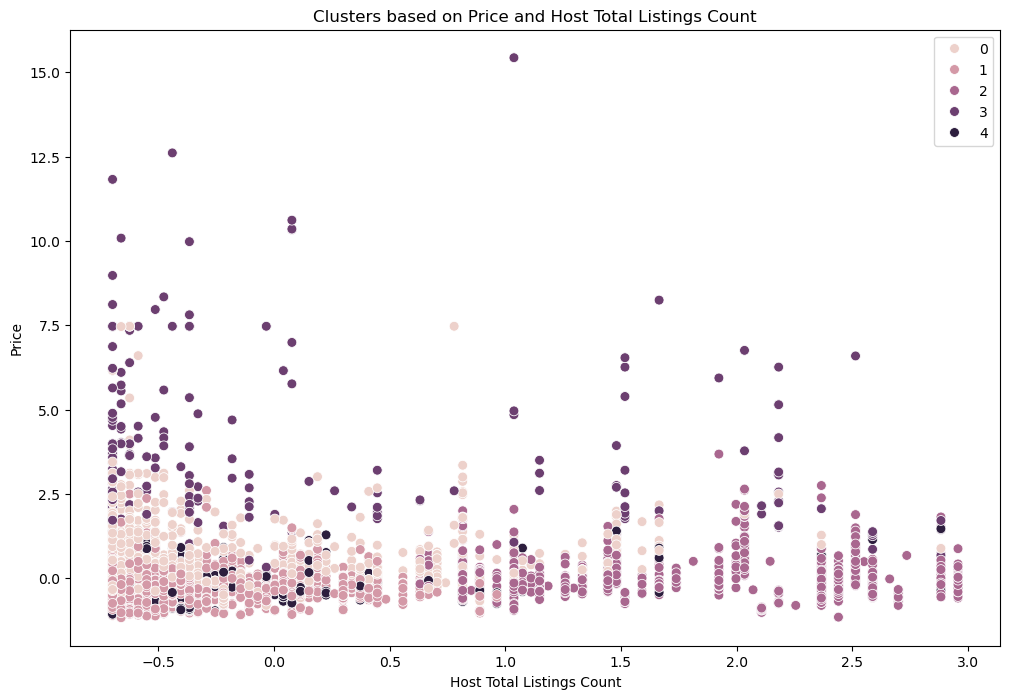

In [39]:
# Plot the clusters for "Price" and "Host Total Listings Count" 

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=listings_cleaned['host_total_listings_count'], y=listings_cleaned['price'], hue=kmeans.labels_, s=50)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Total Listings Count') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Clusters based on Price and Host Total Listings Count') # Title of the plot

# Save the figure
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\clusters_price_host_total_listings_count.png')

# Show the plot
plt.show()

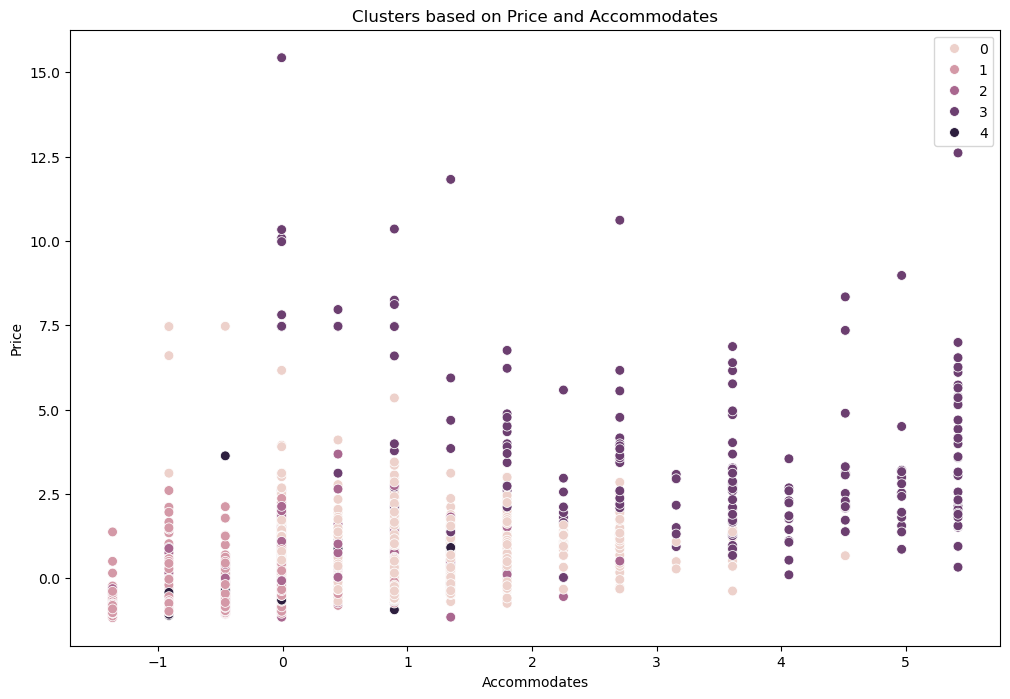

In [40]:
# Plot the clusters for "Price" and "Accommodates" 

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=listings_cleaned['accommodates'], y=listings_cleaned['price'], hue=kmeans.labels_, s=50)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Accommodates') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Clusters based on Price and Accommodates') # Title of the plot

# Save the figure
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\clusters_price_accommodates.png')

# Show the plot
plt.show()

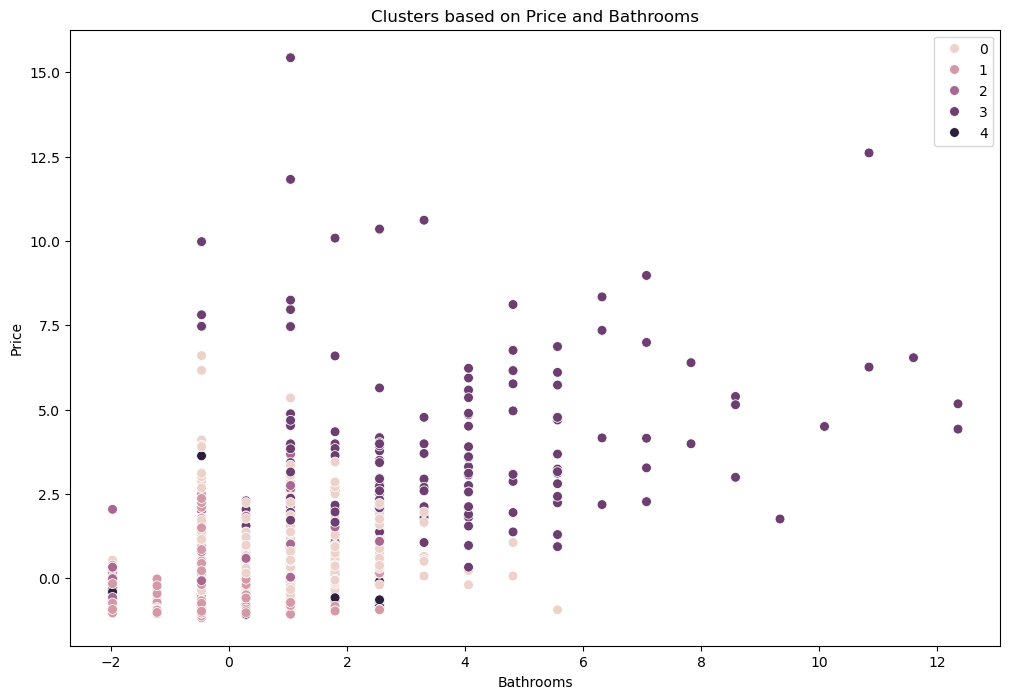

In [41]:
# Plot the clusters for the "Price" and "Bathrooms" variables

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=listings_cleaned['bathrooms'], y=listings_cleaned['price'], hue=kmeans.labels_, s=50)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bathrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Clusters based on Price and Bathrooms') # Title of the plot

# Save the figure
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\clusters_price_bathrooms.png')

# Show the plot
plt.show()

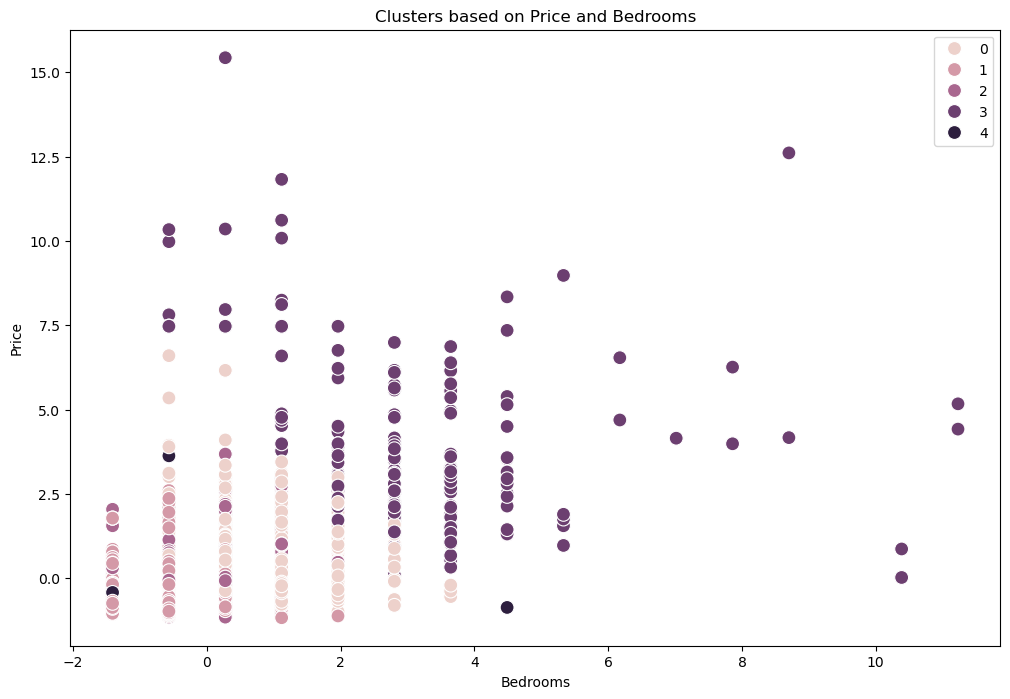

In [42]:
# Plot the clusters for  "Price" and "Bedrooms" 

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=listings_cleaned['bedrooms'], y=listings_cleaned['price'], hue=kmeans.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bedrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Clusters based on Price and Bedrooms') # Title of the plot

# Save the figure
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\clusters_price_bedrooms.png')

# Show the plot
plt.show()

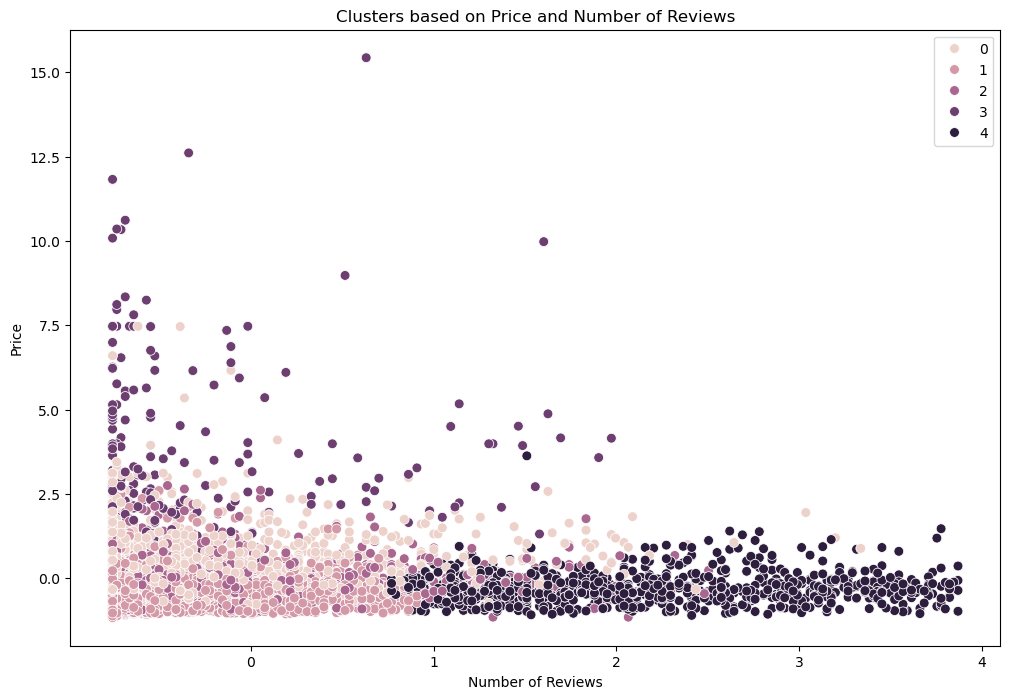

In [43]:
# Plot the clusters for "Price" and "Number of Reviews" 

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=listings_cleaned['number_of_reviews'], y=listings_cleaned['price'], hue=kmeans.labels_, s=50)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Clusters based on Price and Number of Reviews') # Title of the plot

# Save the figure
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\clusters_price_number_of_reviews.png')

# Show the plot
plt.show()

In [44]:
# Getting the centroids of the clusters
centroids = kmeans.cluster_centers_

# Inverse transforming the centroids to the original scale
centroids_original_scale = scaler.inverse_transform(centroids)

# Converting centroids to a dataframe for better readability
centroids_df = pd.DataFrame(centroids_original_scale, columns=columns_to_standardize)

# Displaying the centroids in the original scale
centroids_df

,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,10.928188,5.855034,1.713758,2.774497,191.102013,20.347651
1,8.376963,2.941176,1.061287,1.115183,103.596859,16.300277
2,72.416968,3.834838,1.219765,1.435921,141.064982,22.268953
3,25.901961,11.455882,3.424020,5.230392,567.215686,20.980392
4,11.088660,3.461856,1.162887,1.378351,107.486598,121.042268


## 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

    Note down your thoughts in a markdown cell.


### The identified clusters make sense in the context of the Airbnb market in Málaga, showing a clear segmentation between what we could call premium properties (cluster 2) and more economical ones. The clusters demonstrate how different characteristics such as accommodation capacity, number of bathrooms, and number of bedrooms influence prices. 

### Although the clusters make sense in terms of price segmentation and characteristics, the variability within the clusters suggests that other factors not included in this analysis could influence prices. We could explore other factors such as specific location or additional variables to gain a more comprehensive view of the market.

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [48]:
# Inverse transforming the standardized columns to their original scale

listings_cleaned[columns_to_standardize] = scaler.inverse_transform(listings_cleaned[columns_to_standardize])

In [49]:
# Assigning descriptive names to the clusters 

listings_cleaned.loc[listings_cleaned['clusters'] == 2, 'cluster'] = 'purple'
listings_cleaned.loc[listings_cleaned['clusters'] == 1, 'cluster'] = 'soft purple'
listings_cleaned.loc[listings_cleaned['clusters'] == 0, 'cluster'] = 'pink'
listings_cleaned.loc[listings_cleaned['clusters'] == 3, 'cluster'] = 'dark purple'
listings_cleaned.loc[listings_cleaned['clusters'] == 4, 'cluster'] = 'very dark purple'

In [50]:
# Calculating descriptive statistics for each cluster
                                   
cluster_stats = listings_cleaned.groupby('cluster').agg({
    'host_total_listings_count': ['mean', 'median'], 
    'accommodates': ['mean', 'median'], 
    'bathrooms': ['mean', 'median'],
    'bedrooms': ['mean', 'median'],
    'price': ['mean', 'median'],
    'number_of_reviews': ['mean', 'median']
})

# Displaying the descriptive statistics
cluster_stats

host_total_listings_count        accommodates         \
                                      mean median         mean median   
cluster                                                                 
dark purple                      26.141463   10.0    11.429268   12.0   
pink                             10.879866    4.0     5.853691    6.0   
purple                           72.416968   75.0     3.834838    4.0   
soft purple                       8.378620    4.0     2.940850    3.0   
very dark purple                 11.088660    4.0     3.461856    4.0   

                 bathrooms         bedrooms              price         \
                      mean median      mean median        mean median   
cluster                                                                 
dark purple       3.424390    3.0  5.219512    5.0  566.302439  481.0   
pink              1.712081    2.0  2.774497    3.0  190.907383  165.5   
purple            1.219765    1.0  1.435921    1.0  141.064982  132.0   
soft purple       1.061306    1.0  1.114603    1.0  103.601047   99.0   
very dark purple  1.162887    1.0  1.378351    1.0  107.486598  101.0   

                 number_of_reviews         
                              mean median  
cluster                                    
dark purple              20.936585    8.0  
pink                     20.343624   10.0  
purple                   22.268953   13.0  
soft purple              16.303450    9.0  
very dark purple        121.042268  115.0

### Pink cluster, **Economical**: These are small and economical properties with low prices and few bathrooms and bedrooms.

### Very dark purple cluster: **Experienced host**: Hosts with many listings tend to have properties with moderate prices and sizes. This seems to indicate that large holders prefer quantity over expensive investments.

### Dark purple cluster, **High reviews**: These are medium-sized properties with a high number of reviews. This suggests that although they are not the most expensive, they are perceived as good quality or good value for money by guests.

### Soft purple cluster, **Mid-range**: A group of listings with some features above the basic without reaching premium.

## 10. Propose what these results could be useful for in future steps of an analytics pipeline.

### The clustering analysis provides a clear segmentation of the Airbnb market in Málaga, which can be used to inform targeted marketing, or provide insights to invest. It will also be useful to improve guest satisfactin.

In [105]:
listings_cleaned.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews,clusters,cluster
0,72.0,4.0,1.0,2.0,178.0,100.0,2,purple
1,24.0,7.0,2.0,4.0,219.0,12.0,0,pink
2,3.0,4.0,2.0,2.0,141.0,11.0,0,pink
3,38.0,10.0,2.0,2.0,162.0,0.0,0,pink
4,35.0,2.0,1.0,0.0,53.0,17.0,1,soft purple


In [109]:
# Seleccionar las columnas especificadas y mostrar las primeras filas
columns_to_show = ['id', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews']
listings_subset = listings[columns_to_show]

# Mostrar las primeras filas del dataframe
listings_subset.head()


,id,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,638401413782978130,72,4,1.0,2.0,178.0,100
1,593807685540946920,24,7,2.0,4.0,219.0,12
2,689209787389564671,3,4,2.0,2.0,141.0,11
3,1169368107504912867,38,10,2.0,2.0,162.0,0
4,53218911,35,2,1.0,0.0,53.0,17


In [115]:
listings_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8976 non-null   int64  
 1   host_total_listings_count  8976 non-null   int64  
 2   accommodates               8976 non-null   int64  
 3   bathrooms                  8650 non-null   float64
 4   bedrooms                   8910 non-null   float64
 5   price                      8586 non-null   float64
 6   number_of_reviews          8976 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 491.0 KB


In [119]:
listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 0 to 8975
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  7019 non-null   float64
 1   accommodates               7019 non-null   float64
 2   bathrooms                  7019 non-null   float64
 3   bedrooms                   7019 non-null   float64
 4   price                      7019 non-null   float64
 5   number_of_reviews          7019 non-null   float64
 6   clusters                   7019 non-null   int32  
 7   cluster                    7019 non-null   object 
dtypes: float64(6), int32(1), object(1)
memory usage: 466.1+ KB


In [123]:
# Convertir las columnas comunes a los mismos tipos de datos en ambos dataframes
columns_to_match = ['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews']

for column in columns_to_match:
    listings[column] = listings[column].astype(float)
    listings_cleaned[column] = listings_cleaned[column].astype(float)


In [125]:
# Realizar el merge utilizando las columnas comunes
columns_for_merge = ['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews']
listings_with_clusters = listings.merge(listings_cleaned[columns_for_merge + ['cluster']], on=columns_for_merge, how='left')

# Mostrar las primeras filas del dataframe resultante para verificar
listings_with_clusters.head()


,id,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,cluster
0,638401413782978130,Capitán - Apartamento en el centro de Málaga,Magnificent apartment in the heart of Malaga w...,382146507,2020-12-29,within an hour,1.00,1.00,False,72.0,...,2022-06-12,2024-06-26,VFT/MA/52526,True,63,63,0,0,3.99,purple
1,593807685540946920,"Balcón Victoria, 4 bedrooms with balcony in th...","Balcón Victoria, 4 rooms in Historic Center. I...",11733642,2014-01-28,within an hour,1.00,1.00,False,24.0,...,2022-05-17,2024-06-27,VFT/MA/45175,True,20,20,0,0,0.46,pink
2,689209787389564671,"Lovely spacious 2 bedroom, 2 bathroom with ter...","Set in the perfect location, this stylish, com...",13967638,2014-04-06,within a few hours,1.00,0.43,False,3.0,...,2023-01-02,2024-04-13,CTC-2017080773,False,2,1,1,0,0.60,pink
3,1169368107504912867,Cathedral Penthouse with Terrace,Enjoy the cathedral from the terrace or living...,4884962,2013-01-28,within an hour,1.00,1.00,False,38.0,...,NaN,NaN,VUT/MA/63833,True,17,17,0,0,NaN,pink
4,53218911,excelente estudio cerca del Carrefour,NaN,413971511,2021-07-19,within an hour,0.95,0.99,False,35.0,...,2021-11-13,2024-05-16,Exempt,True,4,4,0,0,0.53,soft purple


In [127]:
# Seleccionar las columnas especificadas y mostrar las primeras filas
columns_to_show = ['id', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews', 'cluster']
listings_with_clusters_subset = listings_with_clusters[columns_to_show]

# Mostrar las primeras filas del dataframe
listings_with_clusters_subset.head()


,id,host_total_listings_count,accommodates,bathrooms,bedrooms,price,number_of_reviews,cluster
0,638401413782978130,72.0,4.0,1.0,2.0,178.0,100.0,purple
1,593807685540946920,24.0,7.0,2.0,4.0,219.0,12.0,pink
2,689209787389564671,3.0,4.0,2.0,2.0,141.0,11.0,pink
3,1169368107504912867,38.0,10.0,2.0,2.0,162.0,0.0,pink
4,53218911,35.0,2.0,1.0,0.0,53.0,17.0,soft purple


In [129]:
# Definir el path
path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\DATA\listings_clusters.csv'

# Guardar el dataframe en el path especificado
listings_with_clusters.to_csv(path, index=False)


In [131]:
listings_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8976 non-null   int64  
 1   host_total_listings_count  8976 non-null   int64  
 2   accommodates               8976 non-null   int64  
 3   bathrooms                  8650 non-null   float64
 4   bedrooms                   8910 non-null   float64
 5   price                      8586 non-null   float64
 6   number_of_reviews          8976 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 491.0 KB


In [133]:
listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 0 to 8975
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  7019 non-null   float64
 1   accommodates               7019 non-null   float64
 2   bathrooms                  7019 non-null   float64
 3   bedrooms                   7019 non-null   float64
 4   price                      7019 non-null   float64
 5   number_of_reviews          7019 non-null   float64
 6   clusters                   7019 non-null   int32  
 7   cluster                    7019 non-null   object 
dtypes: float64(6), int32(1), object(1)
memory usage: 466.1+ KB


In [135]:
# Convertir las columnas especificadas a tipo float
columns_to_convert = ['host_total_listings_count', 'accommodates', 'number_of_reviews']

for column in columns_to_convert:
    listings[column] = listings[column].astype(float)

# Verificar los cambios
print(listings[columns_to_convert].dtypes)


host_total_listings_count    float64
accommodates                 float64
number_of_reviews            float64
dtype: object


In [137]:
listings_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8976 non-null   int64  
 1   host_total_listings_count  8976 non-null   int64  
 2   accommodates               8976 non-null   int64  
 3   bathrooms                  8650 non-null   float64
 4   bedrooms                   8910 non-null   float64
 5   price                      8586 non-null   float64
 6   number_of_reviews          8976 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 491.0 KB


In [139]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8976 non-null   int64  
 1   name                                          8976 non-null   object 
 2   description                                   8714 non-null   object 
 3   host_id                                       8976 non-null   int64  
 4   host_since                                    8976 non-null   object 
 5   host_response_time                            8395 non-null   object 
 6   host_response_rate                            8395 non-null   float64
 7   host_acceptance_rate                          8594 non-null   float64
 8   host_is_superhost                             8568 non-null   object 
 9   host_total_listings_count                     8976 non-null   f

In [141]:
# Realizar el merge utilizando las columnas comunes y dar un nuevo nombre al dataframe resultante
columns_for_merge = ['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews']
listings_with_clusters_new = listings.merge(listings_cleaned[columns_for_merge + ['cluster']], on=columns_for_merge, how='left')

# Verificar el número de filas y el contenido después del merge
listings_with_clusters_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9150 non-null   int64  
 1   name                                          9150 non-null   object 
 2   description                                   8868 non-null   object 
 3   host_id                                       9150 non-null   int64  
 4   host_since                                    9150 non-null   object 
 5   host_response_time                            8538 non-null   object 
 6   host_response_rate                            8538 non-null   float64
 7   host_acceptance_rate                          8751 non-null   float64
 8   host_is_superhost                             8739 non-null   object 
 9   host_total_listings_count                     9150 non-null   f